### Predicting Customer Purchases in E-Commerce

### 데이터 분석 목적
- E-Commerce 사용자들의 데이터를 분석하여, 사용자들의 구매 패턴에 따른 군집 분석
- 군집화 결과를 활용해서 추후 마케팅, 추천에 활용
   
### Key Point
- Sparse 데이터를 처리하는 방법
- Unsupervised Learning 기반의 데이터 분석 방법
- K-means Model 학습과 최적화 방법


In [1]:
%pip install --upgrade pandas-profiling
# 런타임 재실행 필수!

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.3 MB 18.2 MB/s eta 0:00:01
   -------------------------------- ------- 7.6/9.3 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 16.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from datetime import datetime
import random
import ydata_profiling as pandas_profiling

# library for statistic
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

# library for machine learning
from sklearn.cluster import KMeans

%matplotlib inline


## 1. Data Processing 1

### 1-1 Data Load

In [15]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: EC96-19ED

 c:\Users\82107\Downloads ���͸�

2022-04-19  ���� 01:04            98,876 (2022-1)�ٽú��¹̱���ȸ �߰�����.pdf
2022-12-20  ���� 08:23         1,313,856 (LH������)�����ڸ���������_���������Ŀ�_221205.pdf
2022-12-18  ���� 10:52            59,255 (����)2023�г⵵ �Ҹ����л� ����-.pdf
2021-04-02  ���� 12:49           558,762 (��Ƽ)�����޸𺸵�.pdf
2024-09-19  ���� 12:24            62,464 (����2)_2024�г⵵_2�б�_����_TA_���п���_��û_�ȳ���_2024.9.12..hwp
2024-12-18  ���� 09:25            16,896 (����6)_(����)_��������_�ɻ�(���ɻ�)_���������(���).hwp
2023-04-19  ���� 03:48            17,482 (���)��ǰ ��� �� ���ҿ� ���� ���� �� ������ (1).docx
2023-04-19  ���� 03:44            17,482 (���)��ǰ ��� �� ���ҿ� ���� ���� �� ������.docx
2022-10-03  ���� 04:15           431,275 (�Ի�Ȯ����_���)(22-2)_�Ի�ȳ���(����)-8.18 update.pdf
2022-05-30  ���� 07:46            11,398 (������) �¶��ΰ������� �����ڷ�.xlsx
2025-02-13  ���� 06:06    <DIR>          .
2025-02-11  ���� 04:

In [16]:
import pandas as pd

# Windows 경로는 raw string을 사용해서 역슬래시 문제를 피합니다.
file_path = r"C:\Users\82107\Downloads\2019-Nov_sample_10percent.csv"
random_state = 1234



In [17]:
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0               event_time event_type  product_id  \
0    42912469  2019-11-17 12:55:27 UTC       view     1801940   
1    33404333  2019-11-16 04:44:35 UTC       view   100003663   
2    28620112  2019-11-15 08:43:53 UTC       view     1004249   
3     8744840  2019-11-06 10:21:52 UTC       view     3701134   
4    58422604  2019-11-25 15:12:34 UTC       view     1004505   

           category_id                  category_code       brand   price  \
0  2053013554415534427           electronics.video.tv       haier  231.64   
1  2053013557133443581  furniture.living_room.cabinet  stendmebel  430.87   
2  2053013555631882655         electronics.smartphone       apple  739.04   
3  2053013565983425517  appliances.environment.vacuum       bosch  115.81   
4  2053013555631882655         electronics.smartphone      xiaomi  514.56   

     user_id                          user_session  
0  557260014  9eae31f2-7728-4a63-8ec1-214fa7b1a913  
1  532931161  356b963b-ac2a-43cc-9ad2-c9

In [18]:
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,42912469,2019-11-17 12:55:27 UTC,view,1801940,2053013554415534427,electronics.video.tv,haier,231.64,557260014,9eae31f2-7728-4a63-8ec1-214fa7b1a913
1,33404333,2019-11-16 04:44:35 UTC,view,100003663,2053013557133443581,furniture.living_room.cabinet,stendmebel,430.87,532931161,356b963b-ac2a-43cc-9ad2-c9f5eaadcb60
2,28620112,2019-11-15 08:43:53 UTC,view,1004249,2053013555631882655,electronics.smartphone,apple,739.04,550988096,aa13bf9c-1e22-405d-a5f0-3803ffe546c8
3,8744840,2019-11-06 10:21:52 UTC,view,3701134,2053013565983425517,appliances.environment.vacuum,bosch,115.81,560410260,97b64f35-ee84-4732-bfc9-78a1b4bc1426
4,58422604,2019-11-25 15:12:34 UTC,view,1004505,2053013555631882655,electronics.smartphone,xiaomi,514.56,516687754,8f147c20-c958-49b9-a391-c27eecf56fb0


	Unnamed: 0는 무의미한 열로 판단됨.

### 1-2 잘못된 데이터 제거

In [19]:
df = df.drop(columns=["Unnamed: 0"])

In [20]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

### 1-3 Duplicated Data 확인

In [21]:
print("중복된 항목 수 :", len(df[df.duplicated()]))

중복된 항목 수 : 1999


In [22]:
df = df.drop_duplicates()

In [23]:
print("중복된 항목 수 :", len(df[df.duplicated()]))

중복된 항목 수 : 0


In [24]:
df = df.reset_index(drop=True)

중복된 행을 제거한 후 인덱스를 재정렬
인데스가 불연속적: 데이터 분석 시 문제 발생할 수 있음.

## 2. Data EDA

### 2-1 Data Type and Summary

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748199 entries, 0 to 6748198
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 463.4+ MB


In [26]:
# categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

event_time object ['2019-11-17 12:55:27 UTC' '2019-11-16 04:44:35 UTC'
 '2019-11-15 08:43:53 UTC' ... '2019-11-11 22:57:52 UTC'
 '2019-11-22 19:42:54 UTC' '2019-11-03 12:10:06 UTC']
event_type object ['view' 'cart' 'purchase']
product_id int64 [  1801940 100003663   1004249 ... 100005293  13800335 100010746]
category_id int64 [2053013554415534427 2053013557133443581 2053013555631882655
 2053013565983425517 2053013566176363511 2053013554591695207
 2053013554776244595 2053013557166998015 2053013555573162395
 2053013563651392361 2134905044833666047 2053013558920217191
 2053013563911439225 2053013563693335403 2053013563173241677
 2053013554658804075 2053013563584283495 2061717937420501730
 2135658542386905834 2053013564003713919 2053013553056579841
 2053013557024391671 2053013566243472379 2053013563944993659
 2053013552863641845 2053013557192163841 2053013565069067197
 2053013555262783879 2053013564918072245 2053013553912217915
 2053013553341792533 2053013556227473861 2053013560144954031
 

In [27]:
# categorical -> object
# unique value와 data description을 함께 확인하며, heuristic 하게 결정.

list_casting_as_object = ["product_id", "category_id", "user_id"]
for column_name in list_casting_as_object:
  df[column_name] = df[column_name].astype("string")

정수형인 ID들을 분석하기위해 문자형으로 타입 변환 시켜줌

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748199 entries, 0 to 6748198
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     string 
 3   category_id    string 
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        string 
 8   user_session   object 
dtypes: float64(1), object(5), string(3)
memory usage: 463.4+ MB


In [29]:
list_categorical_columns = list(df.select_dtypes(include=['string','object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['float64']).columns)
target_column = "shares"
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

9
8
1


numeric은 가격밖에 없으므로 1개가 맞음.
그리고 나머지 8개 하니깐 총 9개

In [31]:
df.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    2190226
brand             923368
price                  0
user_id                0
user_session           0
dtype: int64

In [30]:
df.columns[df.isna().sum() != 0]

Index(['category_code', 'brand'], dtype='object')

#### Summary of Data Set
##### - Number of Variables : 9
    categorical variables : 8
    numeric variables : 1
##### - Number of observations : 6748199
##### - Missing Cells : 2 columns
##### - Duplicated Rows : 1999 (제거 완료)

### 2-2 Independent(독립) Data Explore

#### 1) Categorical Data Analysis

##### 불필요한 컬럼 확인

In [32]:
df[list_categorical_columns].nunique().sort_values()

event_type             3
category_code        127
category_id          674
brand               3911
product_id        149323
user_id          1830972
event_time       2022083
user_session     4246753
dtype: int64

범주형 변수가가 가지는 고유한 값의 개수를 오름차순으로 정렬
값의 수가 너무 많으면 원-핫 인코딩 시 문제가 될 수 있음

In [33]:
# category_id는 제거 (category_code와 유사한 특성 id를 mapping) 반대로 제거해도 됨, 카테고리가 너무많으면 오류 잘 남
# brand, product_id, event_time, user_session 제거
column_removed = ["category_id", "brand", "product_id", "event_time", "user_session"]
df = df.drop(column_removed, axis=1)

In [34]:
for column in column_removed:
    list_categorical_columns.remove(column)

In [35]:
df = df[df["event_type"] == "purchase"]
#구매한 데이터만 필터링해서 사용용

In [36]:
display(df)

,event_type,category_code,price,user_id
199,purchase,NaN,100.39,561394679
471,purchase,electronics.smartphone,255.57,530510565
487,purchase,NaN,85.71,567695354
651,purchase,electronics.smartphone,88.26,563648409
653,purchase,electronics.smartphone,1029.09,560198101
...,...,...,...,...
6747592,purchase,electronics.audio.headphone,25.69,575990174
6747762,purchase,NaN,36.04,572523941
6747799,purchase,electronics.smartphone,104.93,550413435
6747830,purchase,appliances.kitchen.juicer,128.68,575871876


구매하는 사람은 9만여명으로 적어짐
그중 카테고리없는게 약 2.3만
category_code가 3가지 정보를 가지고 있음.

In [37]:
df.isna().sum()

event_type           0
category_code    23474
price                0
user_id              0
dtype: int64

In [38]:
df_filtered = df.dropna().reset_index(drop=True)

In [45]:
df_filtered.isna().sum()

event_type           0
category_code        0
price                0
user_id              0
category_code_1st    0
category_code_2nd    0
dtype: int64

카테고리 1,2,번 나눠보기(3번째는 없는게 많음)

In [39]:
df_filtered["category_code_1st"] = df_filtered["category_code"].apply(lambda x : x.split(".")[0])
df_filtered["category_code_2nd"] = df_filtered["category_code"].apply(lambda x : x.split(".")[1])

In [46]:
df_filtered

,event_type,category_code,price,user_id,category_code_1st,category_code_2nd
0,purchase,electronics.smartphone,255.57,530510565,electronics,smartphone
1,purchase,electronics.smartphone,88.26,563648409,electronics,smartphone
2,purchase,electronics.smartphone,1029.09,560198101,electronics,smartphone
3,purchase,electronics.video.tv,694.17,572466923,electronics,video
4,purchase,electronics.smartphone,179.16,547251428,electronics,smartphone
...,...,...,...,...,...,...
68068,purchase,electronics.smartphone,136.71,572142479,electronics,smartphone
68069,purchase,electronics.audio.headphone,25.69,575990174,electronics,audio
68070,purchase,electronics.smartphone,104.93,550413435,electronics,smartphone
68071,purchase,appliances.kitchen.juicer,128.68,575871876,appliances,kitchen


범주형 변수로 2개를 추가해줌

In [40]:
list_categorical_columns.append("category_code_1st")
list_categorical_columns.append("category_code_2nd")

In [41]:
df_filtered.nunique()

event_type               1
category_code          120
price                 8770
user_id              57292
category_code_1st       13
category_code_2nd       54
dtype: int64

카테고리가 13, 54로 줄어듬

<Axes: xlabel='category_code', ylabel='Count'>

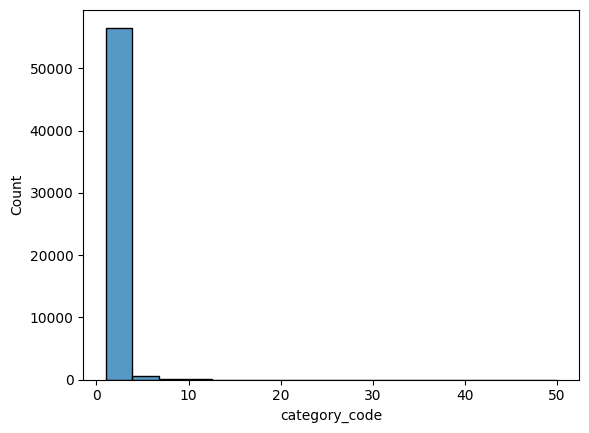

In [42]:
sns.histplot(df_filtered.groupby("user_id").count()["category_code"])

<Axes: ylabel='category_code'>

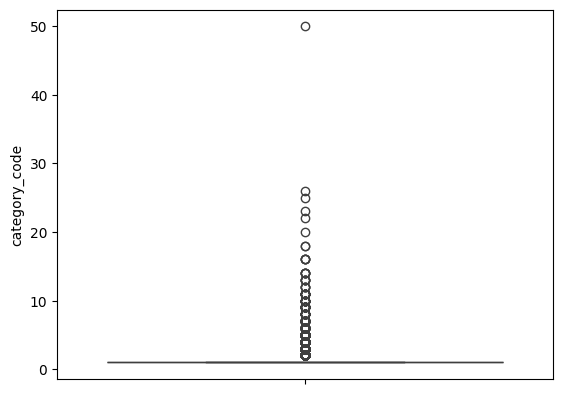

In [48]:
sns.boxplot(df_filtered.groupby("user_id").count()["category_code"])

In [49]:
df_filtered.groupby("user_id").count()["category_code"].describe()

count    57292.000000
mean         1.188176
std          0.724575
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         50.000000
Name: category_code, dtype: float64

대부분 1,2개 구매(평균 1.19개)

In [43]:
display(df_filtered)

,event_type,category_code,price,user_id,category_code_1st,category_code_2nd
0,purchase,electronics.smartphone,255.57,530510565,electronics,smartphone
1,purchase,electronics.smartphone,88.26,563648409,electronics,smartphone
2,purchase,electronics.smartphone,1029.09,560198101,electronics,smartphone
3,purchase,electronics.video.tv,694.17,572466923,electronics,video
4,purchase,electronics.smartphone,179.16,547251428,electronics,smartphone
...,...,...,...,...,...,...
68068,purchase,electronics.smartphone,136.71,572142479,electronics,smartphone
68069,purchase,electronics.audio.headphone,25.69,575990174,electronics,audio
68070,purchase,electronics.smartphone,104.93,550413435,electronics,smartphone
68071,purchase,appliances.kitchen.juicer,128.68,575871876,appliances,kitchen


In [44]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68073 entries, 0 to 68072
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_type         68073 non-null  object 
 1   category_code      68073 non-null  object 
 2   price              68073 non-null  float64
 3   user_id            68073 non-null  string 
 4   category_code_1st  68073 non-null  object 
 5   category_code_2nd  68073 non-null  object 
dtypes: float64(1), object(4), string(1)
memory usage: 3.1+ MB


##### Column별 분포 확인

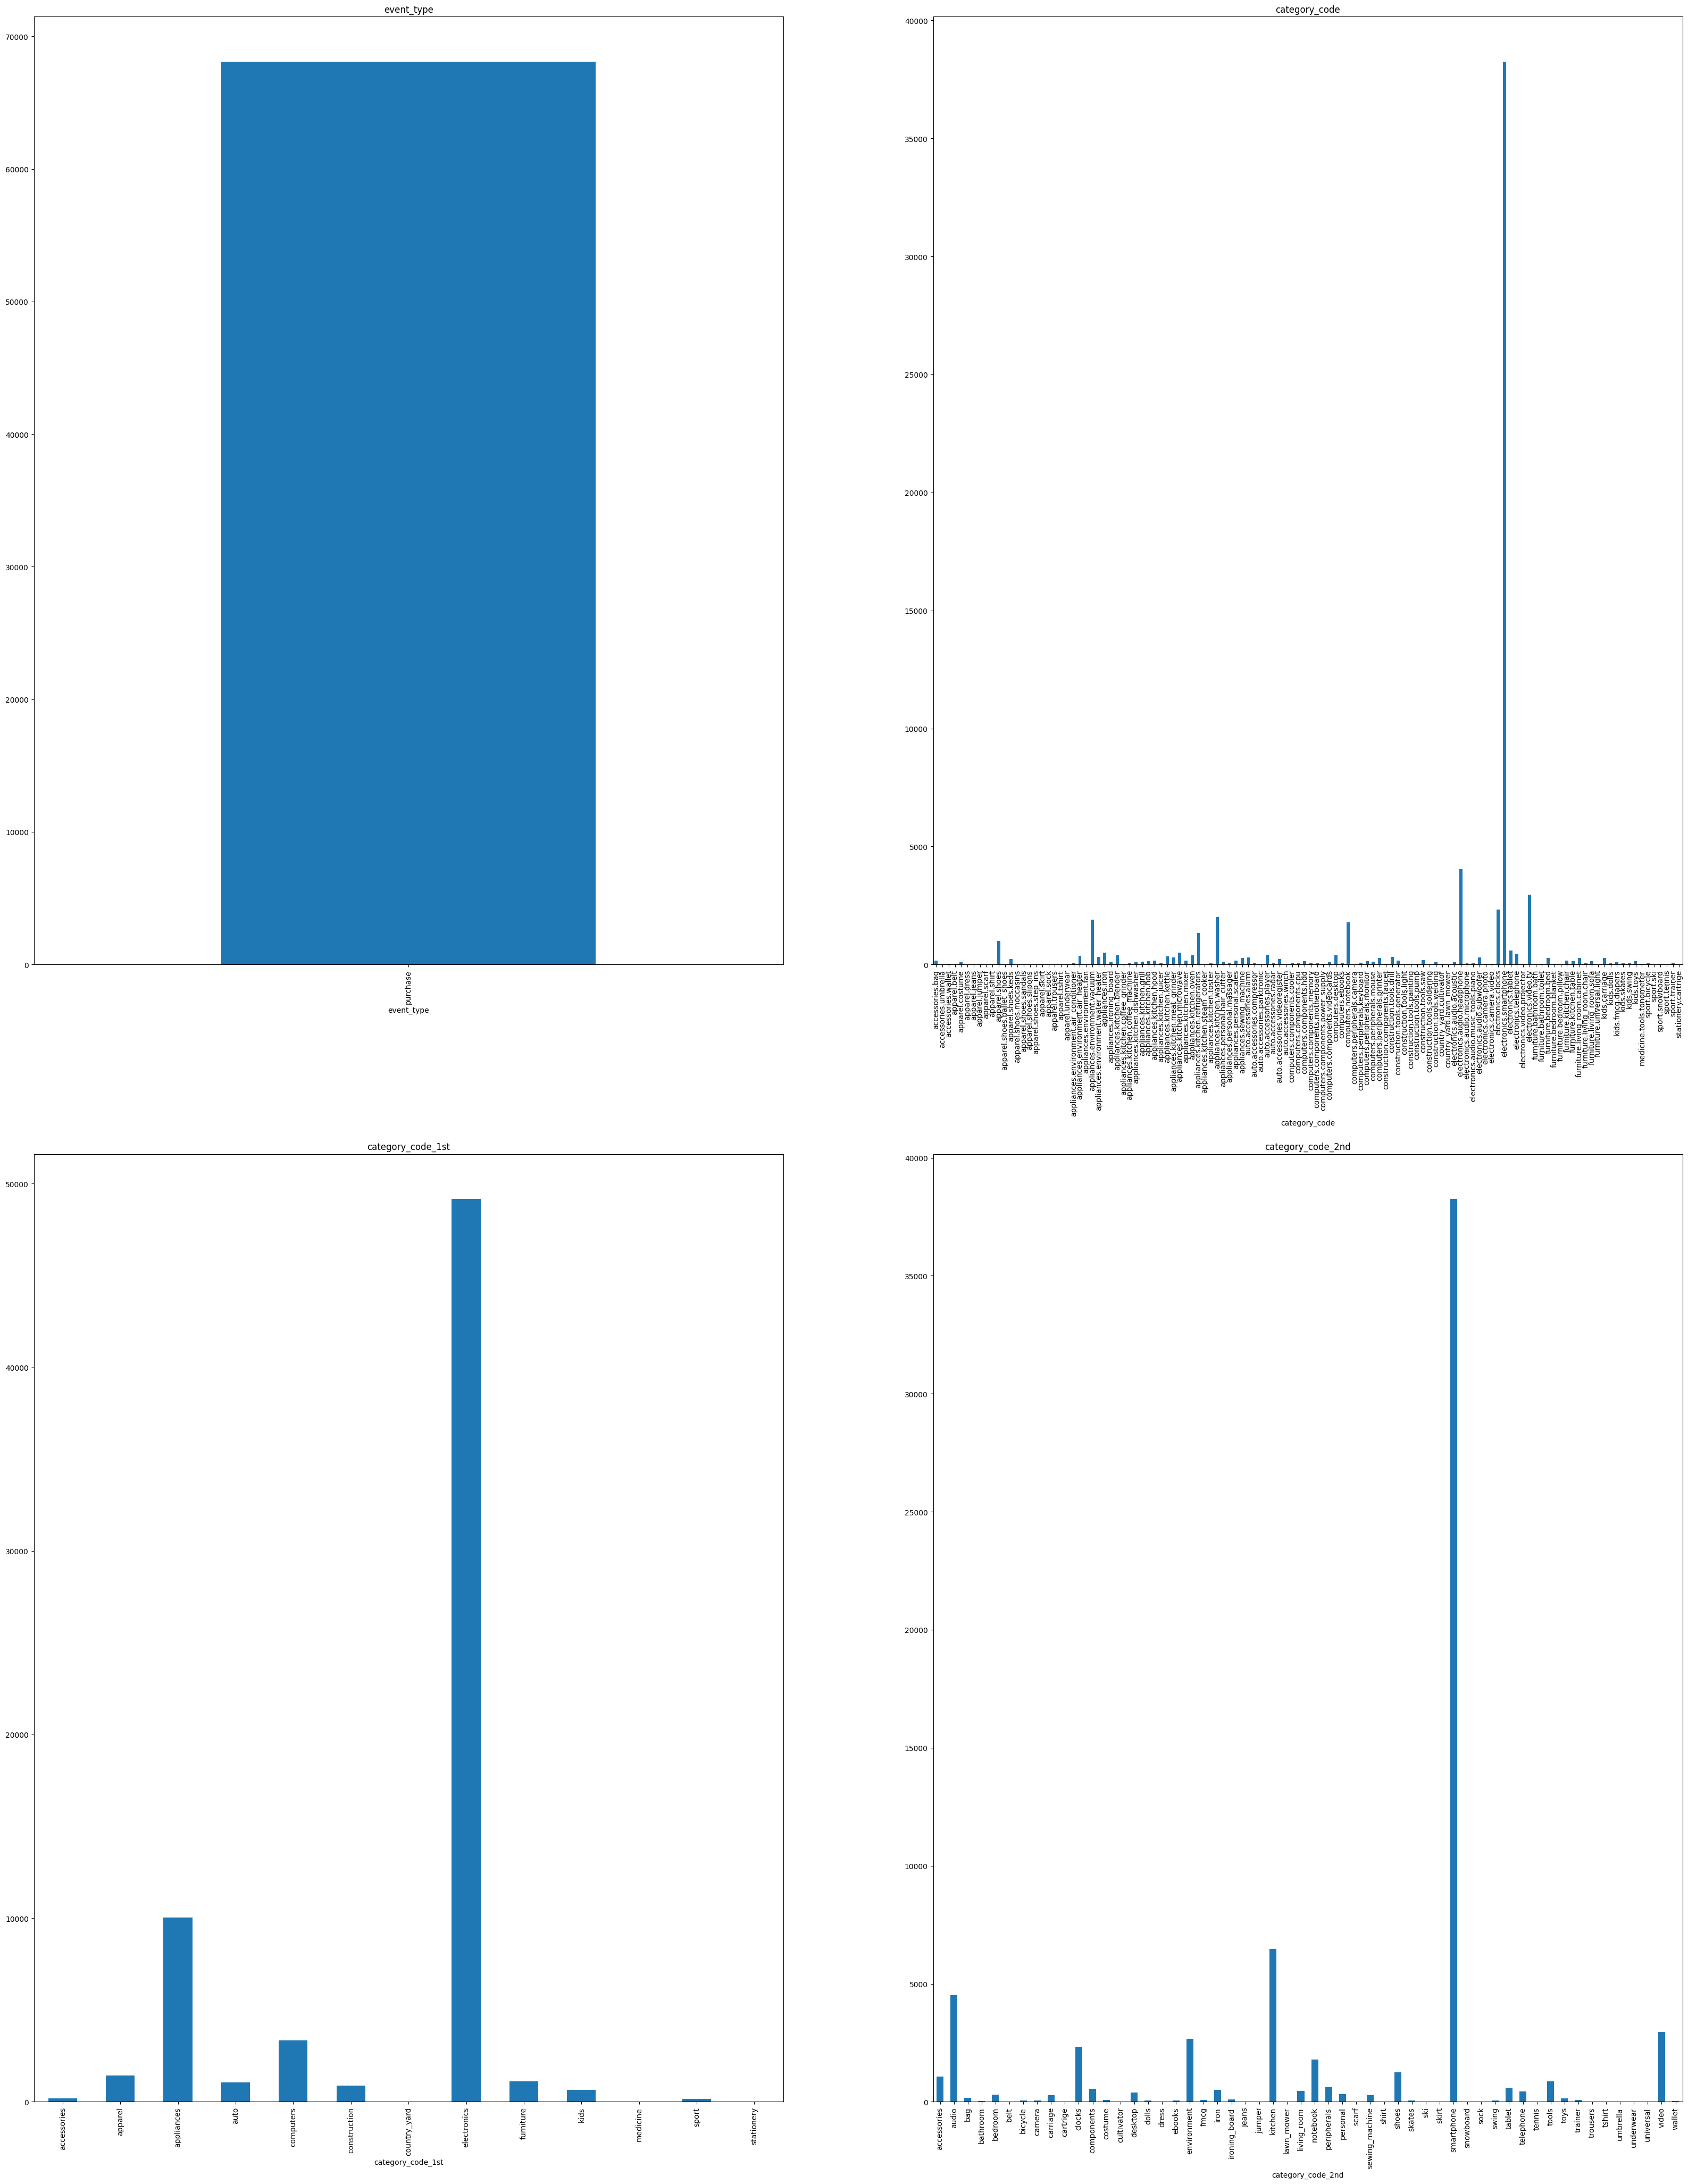

In [50]:
# cateogircla column 별 분포 확인
plt.figure(figsize=(40,40))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_categorical_columns:
    if column_name == "user_id":
        continue
    plt.subplot(2,2,x)
    x = x+1
    df_filtered[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)
plt.show()

user_id는 분석 제외.
구매를 한개만
분류는 카테고리가 엄청 많음
나누니깐 보기 쉬워짐

##### Insight



#### 2) Numeric Data Analysis

##### 불필요한 컬럼 확인

In [51]:
df[list_numeric_columns].nunique().sort_values()

price    11584
dtype: int64

##### Column별 분포 확인

In [52]:
df["price"].describe()

count    91547.000000
mean       300.111189
std        341.639659
min          0.870000
25%         82.840000
50%        169.920000
75%        362.100000
max       2574.070000
Name: price, dtype: float64

<Axes: >

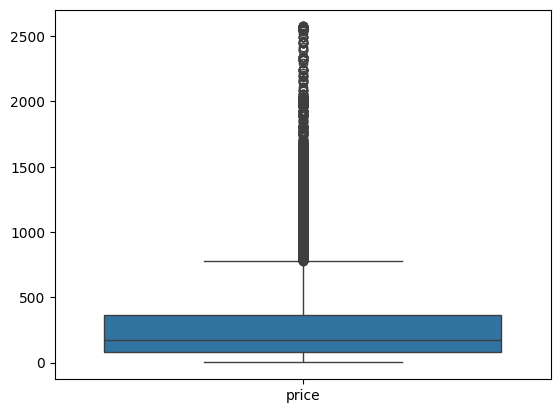

In [53]:
sns.boxplot(df[list_numeric_columns])

In [54]:
#왜도, 첨도
for column_name in list_numeric_columns:
  print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]) )

# 추후 scaling을 활용한 feature preprocessing의 필요성 확인

price skew :  2.1110804586090732 kur :  4.943002067732956


### 2-4 EDA with pandas_profiling

In [61]:
import ydata_profiling
print(dir(ydata_profiling))  # ProfileReport가 있는지 확인




['ProfileReport', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'compare', 'compare_reports', 'config', 'controller', 'expectations_report', 'importlib', 'model', 'pandas_decorator', 'profile_report', 'report', 'serialize_report', 'spec', 'spec_numba', 'utils', 'version', 'visualisation', 'warnings', 'ydata_profiling']


In [63]:
import ydata_profiling
print(ydata_profiling.__version__)  # 최신 버전이 아니면 업데이트 필요


v4.12.2


In [64]:
from ydata_profiling import ProfileReport
print(ProfileReport)  # 정상적으로 import되면 오류 없음


<class 'ydata_profiling.profile_report.ProfileReport'>


In [68]:
import os  # os 모듈을 import해야 함
from ydata_profiling import ProfileReport

# "reports/" 폴더가 없으면 생성
path_lecture = "./reports/"
if not os.path.exists(path_lecture):
    os.makedirs(path_lecture, exist_ok=True)

In [69]:
df_filtered.profile_report().to_file(path_lecture + "data_eda_with_pandasprofiling.html")



Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.41it/s]


## 3. Data Processing 2

### 3-1 Missing Values

In [70]:
df_filtered.isna().sum().sort_values(ascending=False)

event_type           0
category_code        0
price                0
user_id              0
category_code_1st    0
category_code_2nd    0
dtype: int64

In [71]:
df_filtered

,event_type,category_code,price,user_id,category_code_1st,category_code_2nd
0,purchase,electronics.smartphone,255.57,530510565,electronics,smartphone
1,purchase,electronics.smartphone,88.26,563648409,electronics,smartphone
2,purchase,electronics.smartphone,1029.09,560198101,electronics,smartphone
3,purchase,electronics.video.tv,694.17,572466923,electronics,video
4,purchase,electronics.smartphone,179.16,547251428,electronics,smartphone
...,...,...,...,...,...,...
68068,purchase,electronics.smartphone,136.71,572142479,electronics,smartphone
68069,purchase,electronics.audio.headphone,25.69,575990174,electronics,audio
68070,purchase,electronics.smartphone,104.93,550413435,electronics,smartphone
68071,purchase,appliances.kitchen.juicer,128.68,575871876,appliances,kitchen


유저별로 어떤 특성을 가지는지?
클러스터링(누구는 00를 많이 구매하는 경향)

### 3-2 Feature Engineering

In [72]:
help(df_filtered.pivot_table)

Help on method pivot_table in module pandas.core.frame:

pivot_table(values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Level' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as colu

유저별 구매사항을 테이블로

In [73]:
df_filtered_pivot = df_filtered.pivot_table(index=df_filtered.index, columns='category_code_1st', values=["price", "price"], aggfunc=["first","count"]).fillna(0)

한 사람의 구매내역중 category_code_1st 중에 얼마짜리를 구매했고 몇 번 구매했는지 확인

In [74]:
df_filtered_pivot.columns = ['_'.join(col) for col in df_filtered_pivot.columns.values]

In [75]:
df_filtered_pivot["user_id"] = df_filtered["user_id"]

In [76]:
df_filtered_pivot.head(2)

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.57,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,530510565
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.26,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,563648409


In [77]:
df_user_pivot = df_filtered_pivot.groupby("user_id").agg(sum)

### 3-3 Feature Transformation

##### Normalization
*   Standardization과 Normalization은 다른 것.
*   Normalization은 [0,1]로 값을 scaling 하는 것 (예 sklearn의 MinMaxScaler())
*   Standardization은 정규분포의 표준화를 활용하여 scaling하는 것 (예 sklearn의 StandardScaler())



k means 에서 정규화는 중요(거리기반이기 때문)

In [78]:
df_user_pivot.head(1)

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery
user_id,,,,,,,,,,,,,,,,,,,,,
225644257,0.0,0.0,0.0,0.0,40.91,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_user_pivot.loc[:, :] = scaler.fit_transform(df_user_pivot)
df_user_pivot.head(1)

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery
user_id,,,,,,,,,,,,,,,,,,,,,
225644257,0.0,0.0,0.0,0.0,0.002869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0.002869	

MinMaxScaler Review
*   Feature Transformation(Scaling) 기법
*   ( X- (X의 최솟값) ) / ( X의 최댓값 - X의 최솟값 )
*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
*   https://en.wikipedia.org/wiki/Feature_scaling



In [81]:
# title_sentiment_polarity 컬럼으로 실습

x_min = df_user_pivot["first_price_computers"].min()
x_max = df_user_pivot["first_price_computers"].max()
print(x_min)
print(x_max)

first_price_computers    0.0
first_price_computers    0.0
dtype: float64
first_price_computers    1.0
first_price_computers    1.0
dtype: float64


In [82]:
(df_user_pivot["first_price_computers"] - x_min)/(x_max-x_min)

,first_price_computers,first_price_computers
user_id,,
225644257,0.002869,0.002869
315835876,0.000000,0.000000
435584787,0.000000,0.000000
448659331,0.000000,0.000000
465378521,0.000000,0.000000
...,...,...
579908999,0.000000,0.000000
579926563,0.000000,0.000000
579935169,0.000000,0.000000


225644257	0.002869	0.002869  위에랑 동일하게 표준화

### 3-4 Summary
##### 최종 생성 Feature는 아래와 같은 특성을 가짐
1.   pivoting by Main Category Data
2.   aggregation by user_id

##### df_user_pivot

## 4. Model Analysis


### Model Optimization with K-means Algorithm

- K-Means 알고리즘은 비지도학습 중에서 가장 대표적인 클러스터링(Clustering) 알고리즘입니다. 클러스터링은 데이터를 비슷한 특성을 가진 그룹으로 나누는 작업을 의미한다.
- K-Means 알고리즘은 매우 빠르고 간단한 구현으로도 좋은 성능을 보여주는 클러스터링 알고리즘 중 하나이지만, 초기 클러스터 중심값 선택이나 클러스터 개수 선택 등 초기 설정이 클러스터링 성능에 영향을 미친다.

- 알고리즘의 동작 순서는 다음과 같다.
1. 초기 클러스터 중심값 지정
2. 모든 데이터 포인트들을 가장 가까운 클러스터에 할당
3. 할당된 클러스터에 대해 클러스터 중심값을 재계산
4. 2-3 과정을 반복하며 클러스터 중심값과 할당을 업데이트
- 이 알고리즘에서 K개의 클러스터 중심값은 초기에 무작위로 선택된다. 그리고 각 데이터 포인트는 가장 가까운 클러스터 중심값에 할당된다. 이후 할당된 데이터 포인트를 이용해 해당 클러스터의 중심값을 계산한다. 클러스터 중심값이 업데이트되면 각 데이터 포인트는 다시 가장 가까운 클러스터 중심값에 할당된다. 이 과정을 클러스터 할당과 중심값 계산이 변화가 없을 때까지 반복한다.

In [83]:
sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_user_pivot)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\82107\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82107\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82107\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\82107\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

클러스터를 2~20까지 해봄

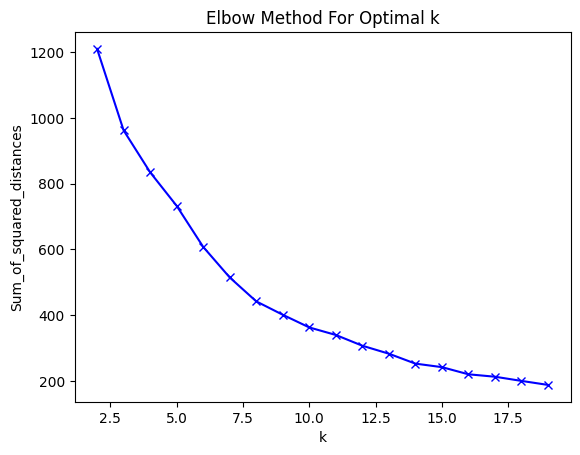

In [84]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow Method는 클러스터 개수(K)를 변화시켜가면서 K-Means 알고리즘을 수행한 결과를 나타낸 그래프에서, 그래프의 모양이 팔꿈치(Elbow) 모양을 띄는 지점에서 최적의 클러스터 개수를 결정하는 방법.

이 방법은 클러스터 개수를 점차 증가시켜가면서 K-Means 알고리즘을 실행하고, 각 클러스터마다의 제곱 오차합(SSE, Sum of Squared Errors)을 구한 뒤 이를 그래프로 나타냄. 그래프에서 클러스터 개수(K)가 증가함에 따라 SSE는 감소하게 되며, 이는 클러스터 개수(K)가 증가하면 각 클러스터에 할당된 데이터 포인트들과 해당 클러스터의 중심점과의 거리가 줄어들기 때문. 그리고 그래프에서 SSE의 증감폭이 크게 줄어드는 팔꿈치 모양을 띄는 지점에서 최적의 클러스터 개수를 결정,

k=8 is elbow

In [85]:
km_final = KMeans(n_clusters=8)
km_final = km_final.fit(df_user_pivot)


C:\Users\82107\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [86]:
km_final.predict(df_user_pivot)

array([6, 0, 4, ..., 2, 0, 6])

In [87]:
df_user_pivot["cluster_number"] = km_final.predict(df_user_pivot)

어떤 유저가 어떤 클러스터 속하는지지

In [88]:
cluster_result = df_user_pivot.groupby("cluster_number").agg(np.mean)

클러스터 별 집단 평균
카테고리1 구별 평균 얼마, 몇번 구매했는지

In [89]:
len(cluster_result.columns)

52

In [90]:
cluster_result.iloc[:,:26]

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,first_price_medicine,first_price_sport,first_price_stationery
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,0.000,4.328903e-07,1.073582e-07,0.000000,0.000000,0.000000,0.000054,0.019322,0.000000,0.000746,...,0.000000,0.000000,0.000000,0.000054,0.019322,0.000000,0.000746,0.000354,0.000367,0.000111
1,0.113,1.358509e-03,2.050868e-04,0.000392,0.001223,0.000000,0.000000,0.001538,0.000934,0.000000,...,0.000392,0.001223,0.000000,0.000000,0.001538,0.000934,0.000000,0.000000,0.000000,0.000000
2,0.000,4.758093e-05,3.145846e-02,0.000000,0.000060,0.000002,0.000000,0.001448,0.000011,0.000092,...,0.000000,0.000060,0.000002,0.000000,0.001448,0.000011,0.000092,0.000000,0.000010,0.000000
3,0.000,2.210703e-04,4.309557e-04,0.081564,0.000155,0.000061,0.000000,0.001683,0.000000,0.000039,...,0.081564,0.000155,0.000061,0.000000,0.001683,0.000000,0.000039,0.000000,0.000385,0.000000
4,0.000,3.645687e-04,5.791980e-04,0.000000,0.000328,0.073965,0.000000,0.001450,0.000481,0.000135,...,0.000000,0.000328,0.073965,0.000000,0.001450,0.000481,0.000135,0.000000,0.000000,0.000000
5,0.000,1.192884e-01,3.525466e-04,0.000000,0.000198,0.000021,0.000000,0.002141,0.000059,0.000253,...,0.000000,0.000198,0.000021,0.000000,0.002141,0.000059,0.000253,0.000000,0.000000,0.000000
6,0.000,0.000000e+00,1.828825e-04,0.000000,0.032022,0.000000,0.000000,0.002496,0.000000,0.000010,...,0.000000,0.032022,0.000000,0.000000,0.002496,0.000000,0.000010,0.000000,0.000101,0.000000
7,0.000,4.452365e-04,8.916189e-04,0.000000,0.000357,0.000000,0.000000,0.002131,0.132210,0.000894,...,0.000000,0.000357,0.000000,0.000000,0.002131,0.132210,0.000894,0.000000,0.000153,0.000000


두번째 클러스터가 first_price_accessories를 0.113	로 제일 높아서 지불금액이 높은 걸  볼 수 있으며

In [91]:
cluster_result.iloc[:,26:]

,count_price_accessories,count_price_apparel,count_price_appliances,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,...,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000005,0.000003,0.000000,0.000000,0.000000,0.000123,0.023246,0.000000,0.002468,...,0.000000,0.000000,0.000000,0.000123,0.023246,0.000000,0.002468,0.000331,0.001170,0.000368
1,0.513441,0.001792,0.001195,0.001792,0.004779,0.000000,0.000000,0.001828,0.002151,0.000000,...,0.001792,0.004779,0.000000,0.000000,0.001828,0.002151,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000096,0.119344,0.000000,0.000205,0.000027,0.000000,0.001850,0.000043,0.000289,...,0.000000,0.000205,0.000027,0.000000,0.001850,0.000043,0.000289,0.000000,0.000072,0.000000
3,0.000000,0.000216,0.001947,0.345667,0.000541,0.000730,0.000000,0.001967,0.000000,0.000162,...,0.345667,0.000541,0.000730,0.000000,0.001967,0.000000,0.000162,0.000000,0.000325,0.000000
4,0.000000,0.000269,0.003367,0.000000,0.001077,0.267273,0.000000,0.002279,0.001212,0.000404,...,0.000000,0.001077,0.267273,0.000000,0.002279,0.001212,0.000404,0.000000,0.000000,0.000000
5,0.000000,0.119023,0.001872,0.000000,0.000766,0.000191,0.000000,0.002894,0.000153,0.001149,...,0.000000,0.000766,0.000191,0.000000,0.002894,0.000153,0.001149,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.001048,0.000000,0.123045,0.000000,0.000000,0.003064,0.000000,0.000056,...,0.000000,0.123045,0.000000,0.000000,0.003064,0.000000,0.000056,0.000000,0.000224,0.000000
7,0.000000,0.000543,0.004236,0.000000,0.001955,0.000000,0.000000,0.002209,0.213881,0.002444,...,0.000000,0.001955,0.000000,0.000000,0.002209,0.213881,0.002444,0.000000,0.000652,0.000000


count_price_accessories 0.513441로 여러번 구매